In [1]:
import numpy as np
from matplotlib import pyplot as plt

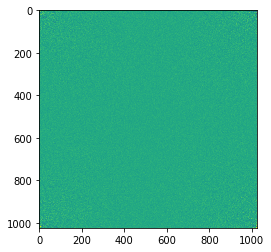

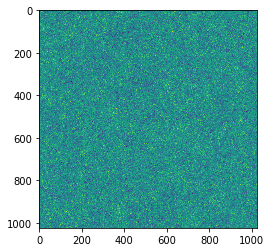

[[ 0.00000000e+00  1.11808349e-19 -9.77264263e-20 ...  1.42936810e-20
   1.66441974e-19 -1.05984998e-19]
 [ 1.35525272e-20 -1.08420217e-19  2.04346699e-20 ... -6.46921413e-20
   6.60685699e-20 -1.59559831e-19]
 [ 6.77626358e-21  8.47032947e-21 -1.01114558e-19 ... -2.12711149e-19
  -6.73391193e-20  2.02334995e-19]
 ...
 [ 1.69406589e-20 -1.08420217e-19  6.88214270e-21 ...  2.79203235e-19
   1.33831206e-19 -1.72582963e-20]
 [-6.09863722e-20  1.30443074e-19 -1.71418293e-19 ... -5.34689548e-20
  -1.24937360e-19 -6.53274161e-20]
 [-1.35525272e-20  2.37169225e-20 -9.35971407e-20 ...  4.03399441e-20
  -1.18584613e-20  4.76456033e-21]]


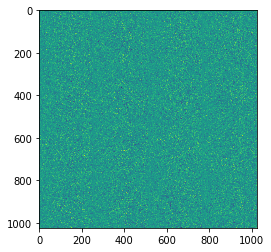

In [2]:
np.random.seed(42)
n = -1
N = 1024
df = np.zeros((N,N),dtype=complex)

for j in range((N//2)+1):
    # Determining the value of k_y 
    k_y = j*2*np.pi/N
    for i in range(N):
        # Determining the value of k_x and sigma_x
        if i <= (N//2):
            k_x = (i)*2*np.pi/N
        else:
            k_x = (-N+i)*2*np.pi/N
        # Avoid dividing by 0
        if i != 0 or j != 0:
            sig = ((k_x**2+k_y**2)**0.5)**(n/2)
        else: 
            sig = 0
        # Drawing a random number from normal distrib 
        df[j][i] = np.random.normal(0,sig)+ 1j*np.random.normal(0,sig)

df[0][0] = 0
df[0][N//2] = (df[0][N//2].real)**2
df[N//2][0] = (df[N//2][0].real)**2
df[N//2][N//2] = (df[N//2][N//2].real)**2

for j in range((N//2)+1):
    for i in range(N):
        df[-j][-i]= df[j][i].conjugate()

plt.imshow((df.real))
plt.show()
df = np.fft.ifft2(df)
plt.imshow((df.real))
plt.show()
print(df.imag)
plt.imshow(df.imag)

In [3]:
df = np.fft.fftshift(df)
print(df)

[[-2.43230439e-04+0.00000000e+00j -1.02814806e-03+1.69406589e-20j
  -2.09734308e-06-5.53747789e-20j ... -2.92006594e-04-7.88799432e-20j
   2.98086963e-04-4.65868121e-21j -2.34759520e-04-7.54918114e-20j]
 [ 1.11229125e-03-6.77626358e-21j  1.83047124e-05-2.71050543e-20j
   2.16207061e-03-1.34466480e-20j ...  2.42840352e-03+1.23349173e-19j
  -3.79307017e-05-1.27054942e-19j -8.64470701e-04-1.34148843e-19j]
 [-1.89638495e-03+6.77626358e-21j  1.75583752e-04+4.06575815e-20j
  -2.67267308e-04+6.99860973e-20j ...  6.21379857e-05+7.69741191e-20j
   9.19751541e-04-2.96461532e-21j  1.23107910e-04+1.65065546e-19j]
 ...
 [-4.26089666e-04-2.03287907e-20j -7.22057052e-04+1.38913403e-19j
  -7.42459601e-04-1.45583788e-19j ... -4.09451541e-05+1.16572909e-19j
  -1.18700601e-03-3.10014059e-19j -1.79165621e-03+2.84814829e-20j]
 [-1.25991013e-04-1.69406589e-21j -4.69581679e-04-8.47032947e-21j
   1.05423148e-03+1.68241919e-19j ... -1.49622403e-03-2.56756862e-19j
  -1.97092045e-03-1.26631426e-19j -1.25742295e-

In [4]:
x = np.array(([0,1,2,3,4,3,2,1],
              [10,11,12,13,14,13,12,11],
              [20,21,22,23,24,23,22,21],
              [30,31,32,33,34,33,32,31],
              [40,41,42,43,44,43,42,41],
              [0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0]))
print(x)
#for i in range(len(x)//2):
#    x[0][-i] = x[0][i]
#print('Shift x axis')
#print(x)
for j in range((len(x)//2)+1):
    for i in range(len(x[0])):
        x[-j][-i]=x[j][i]*-1
print('Conjugate')
print(x)        
x[0][len(x)//2] = 4
x[len(x)//2][len(x)//2] = 44
x[len(x)//2][0] = 40
print('Fixed 3 points')
print(x)

[[ 0  1  2  3  4  3  2  1]
 [10 11 12 13 14 13 12 11]
 [20 21 22 23 24 23 22 21]
 [30 31 32 33 34 33 32 31]
 [40 41 42 43 44 43 42 41]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
Conjugate
[[  0   1   2   3  -4  -3  -2  -1]
 [ 10  11  12  13  14  13  12  11]
 [ 20  21  22  23  24  23  22  21]
 [ 30  31  32  33  34  33  32  31]
 [-40  41  42  43 -44 -43 -42 -41]
 [-30 -31 -32 -33 -34 -33 -32 -31]
 [-20 -21 -22 -23 -24 -23 -22 -21]
 [-10 -11 -12 -13 -14 -13 -12 -11]]
Fixed 3 points
[[  0   1   2   3   4  -3  -2  -1]
 [ 10  11  12  13  14  13  12  11]
 [ 20  21  22  23  24  23  22  21]
 [ 30  31  32  33  34  33  32  31]
 [ 40  41  42  43  44 -43 -42 -41]
 [-30 -31 -32 -33 -34 -33 -32 -31]
 [-20 -21 -22 -23 -24 -23 -22 -21]
 [-10 -11 -12 -13 -14 -13 -12 -11]]
